## Z- Score and Z- Test Concepts and implementation

In [1]:
import pandas as pd
data=pd.read_csv('NHANES_BMI_clean_data.csv')
data.head()

,SEQN,BMXWT,BMXHT,BMXBMI,BMXWAIST,BMXHIP,BMXARMC,BMXLEG,BMXARML
0,130378.0,86.9,179.5,27.0,98.3,102.9,35.7,42.800000,42.0
1,130379.0,101.8,174.2,33.5,114.7,112.4,33.7,38.500000,38.7
2,130380.0,69.4,152.9,29.7,93.5,98.0,36.3,38.500000,35.5
3,130381.0,34.3,120.1,23.8,70.4,103.7,23.4,38.128843,25.4
4,130386.0,90.6,173.3,30.2,106.1,110.6,35.7,42.800000,36.2


## Z-test
A Z-test is a hypothesis test to determine if there's a significant difference between:

- Sample mean and population mean (one-sample Z-test), or
- Two sample means (two-sample Z-test), assuming known population variance

formula:
- z = (sample_mean - population_mean) / standard_error

#### When to use Z-test 

- Use when the sample size is large(n>30).
- Population Standard deviation is known.
- The data follows a normal distribution.

## Z-Score (Standard Score)
The Z-score tells you how many standard deviations a data point is from the mean of the distribution.

 Formula:
z-score= (X-x)/std

where:
- X = observed value
- x = population mean
- std = population standard deviation

#### Interpretation

- A Z-score of 0 means the data point is exactly at the mean.

- A positive Z-score indicates the value is above the mean.

- A negative Z-score indicates the value is below the mean.

Commonly used in standard normal distribution (mean = 0, SD = 1).

#### When to use Z-score

- Comparing scores from different distributions (e.g., test scores).

- Outlier detection (Z > 3 or Z < -3 often considered outliers).

- Probability calculation using Z-tables (area under normal curve)

In [3]:
#maintain Data integrity
test_data=data.copy()


## Test Normality of each column 

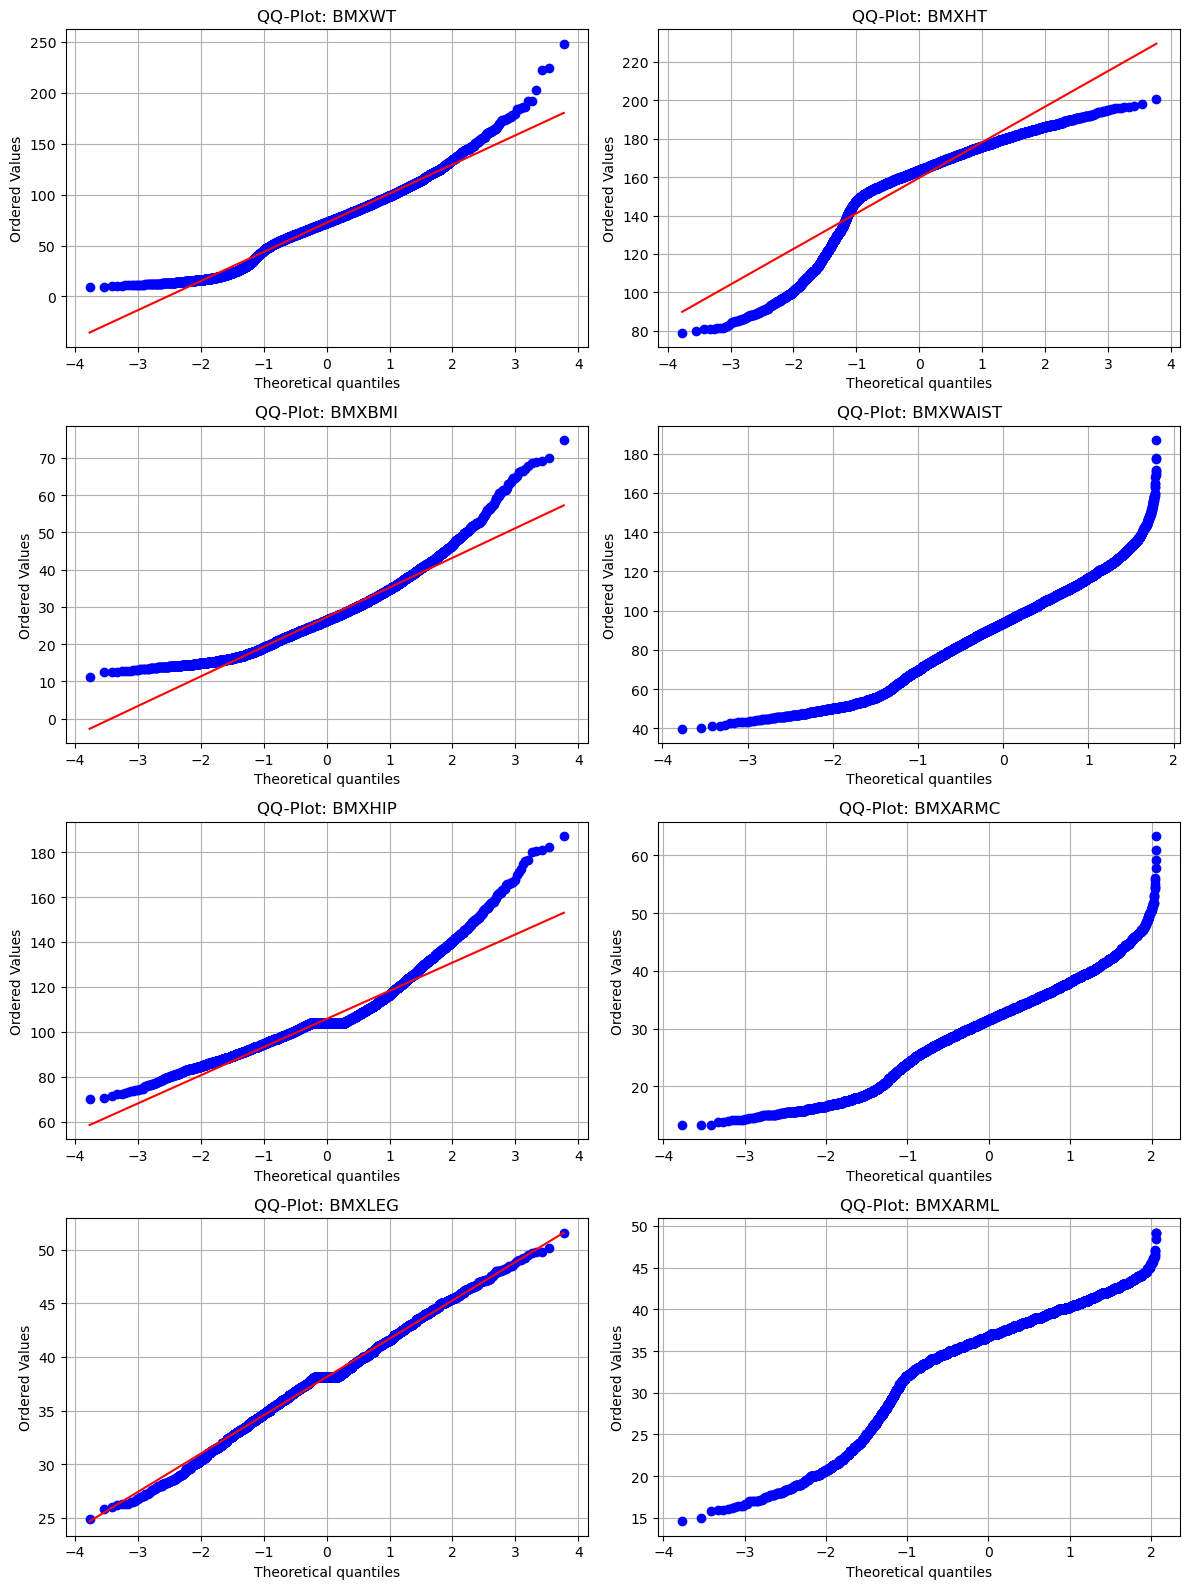

In [5]:
import matplotlib.pyplot as plt
from scipy import stats

# List of columns to check for normality
columns_to_plot = ['BMXWT', 'BMXHT', 'BMXBMI', 'BMXWAIST', 'BMXHIP', 'BMXARMC', 'BMXLEG', 'BMXARML']

# Create the 4x2 subplots
fig, axes_array = plt.subplots(4, 2, figsize=(12, 16))

# Flatten axes to use as a 1D list
axes = axes_array.flatten()

# Generate QQ-plots
for i, col in enumerate(columns_to_plot):
    stats.probplot(test_data[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ-Plot: {col}")
    axes[i].grid(True)

# Adjust layout
plt.tight_layout()
plt.savefig('QQ_plot_Checking_Normality.png')
plt.show()


## Check Skewness
From QQ-plot Column BMXLEG= 'Upper Leg Length (cm) – measured from hip to knee seems normals'. Lets confirm by checking skewness

In [7]:
print("Skewness (BMXLEG):",test_data['BMXLEG'].skew())

Skewness (BMXLEG): -0.08045227274847434


#### thumb of rule

- If skew() > 1 or < -1 = Highly skewed 
- If skew() ≈ 0 = Normal 

 ###### which means we can perform Z-score and Z-test on column  BMXLEG because distribution is normal.

## Z-score 

In [9]:
#creating dedicated BMXLEG series for further calculations
col_BMXLEG=pd.Series(test_data['BMXLEG'])


In [11]:
import numpy as np
mean=float(np.mean(col_BMXLEG))
std_dev=float(np.std(col_BMXLEG))
z_scores=[(x-mean)/std_dev for x in col_BMXLEG]


### Z-score transformed data

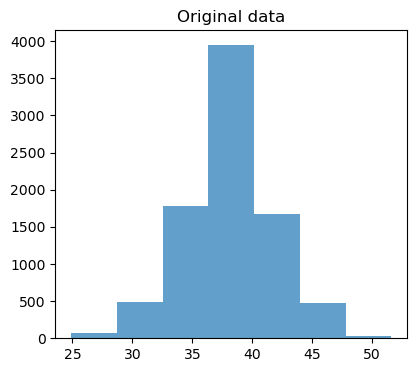

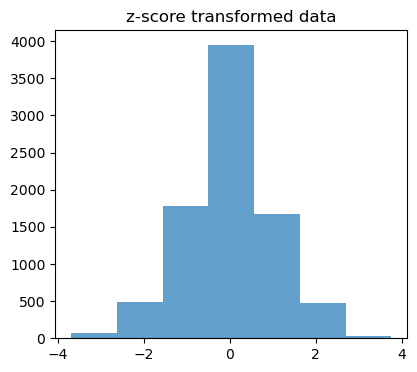

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(col_BMXLEG,bins=7,alpha=0.7)
plt.title("Original data")

plt.figure(figsize=(10,4))
plt.subplot(122)
plt.hist(z_scores,bins=7,alpha=0.7)
plt.title("z-score transformed data")

plt.savefig('Standardization.png')
plt.show()

#### Interpretation

- Standardization doesn't change distribution shape because its linear transformations
- shape of distribution persist because of Order Preservation and Relative distance
- Order Preservation: if x1<x2 originally then z1<z2 after standardization
- Relative Distance: the gap between points scales proportionally.

### Z-score to locate and compare data point to population mean

lets assume i want to find the my BMXLEG is 30cm, we will locate my measurement such that how far from the true mean in distribution. 

In [15]:
import scipy.stats as stats
x=30
z_score= (x-mean)/std_dev
percentile=stats.norm.sf(abs(z_score)) * 100

print(f'My BMXLEG location:{z_score:.2f}')
print(f'percentile: {percentile:.2f}%')
print(f'Population mean: {mean:.2f}')

My BMXLEG location:-2.27
percentile: 1.17%
Population mean: 38.13


#### Interpretation
- Location: Below average, half of center , at -2sigma
- Meaning: My Leg measurement is  2sigma lower than average(population)
- Empirical Rule: My leg measurement falls within 95% of distribution.
- Insights: Beyonds plus-minus 2sigma is rare value(either exceptional or concerning)

#### Clinical/Statistical Significance:
- This is a rare/extreme value (only ~1% of people have shorter leg lengths)

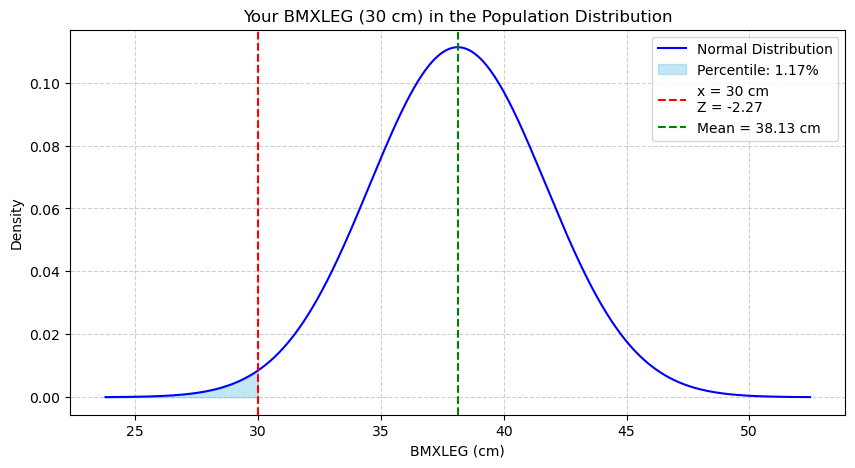

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Create x-axis values for the normal distribution
x_values = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y_values = norm.pdf(x_values, mean, std_dev)

# Plot the normal distribution
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label='Normal Distribution', color='blue')

# Fill area to the left of x=30
plt.fill_between(x_values, y_values, 0, where=(x_values <= x), color='skyblue', alpha=0.5, label=f'Percentile: {percentile:.2f}%')

# Vertical line at x = 30
plt.axvline(x, color='red', linestyle='--', label=f'x = {x} cm\nZ = {z_score:.2f}')

# Add mean line
plt.axvline(mean, color='green', linestyle='--', label=f'Mean = {mean:.2f} cm')

# Labels and legend
plt.title('Your BMXLEG (30 cm) in the Population Distribution')
plt.xlabel('BMXLEG (cm)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('Zcore_to_locate_datapoint.png')

plt.show()


### Z-score to find outliers

Number of outliers: 31
225     49.2
234     49.5
278     49.0
570     27.2
727     49.2
788     25.8
1036    26.3
1300    51.6
1593    26.3
2062    26.9
2360    26.7
2463    26.2
2508    26.6
2579    27.2
3381    49.8
3779    24.9
3914    26.5
3998    26.5
4188    27.3
4590    48.9
4921    26.0
5308    50.2
5583    27.0
5713    49.8
5723    27.2
6013    49.7
6083    26.7
6325    26.3
7071    27.0
7107    49.0
8048    26.9
Name: BMXLEG, dtype: float64


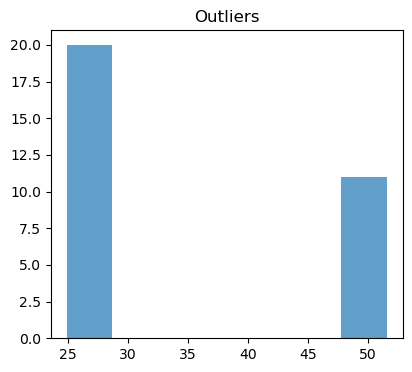

In [21]:


# col_BMXLEG is a pandas Series:
z_scores = (col_BMXLEG - col_BMXLEG.mean()) / col_BMXLEG.std()
outliers = col_BMXLEG[abs(z_scores) >= 3]

print(f"Number of outliers: {outliers.count()}")
print(outliers)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.hist(outliers,bins=7,alpha=0.7)
plt.title("Outliers")
plt.savefig('Z_score_to_find_outliers.png')

# Z-Test


## Type of Z-test
1. One-Sample Z-test: Test if the sample mean is significantly different from a known population mean.
2. Two-Sample Z-Test: Test if the means of two independent samples are significantly different.
3. Z-Test for Proportions: Compare a sample proportion to a known one, or compare two proportions.


## One-Sample Z-test

In [24]:

population_mean=np.mean(col_BMXLEG)
population_std=np.std(col_BMXLEG,ddof=0)
print(f"Population of BMXLEG: {population_mean:.2f}")
print(f"Population Standard Deviation: {population_std:.2f}")

Population of BMXLEG: 38.13
Population Standard Deviation: 3.59


#### Hypothesis
- Null Hypothesis(h_0): mu_0 = 38.13
- Alternative Hypothesis(h_1): mu_1 != 38.13 (two tail test)

In [30]:
from statsmodels.stats.weightstats import ztest

sample_size=50
random_sample=col_BMXLEG.sample(n=sample_size,replace=False,random_state=42) #without replace is recommended for z-test
sample_mean=np.mean(random_sample)
#----------Manually-----------#
#one-sample test
z_stat=(sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
p_value=2*norm.sf(abs(z_stat)) #two-tail

#----------Using Built in Functions-------#
z_stat, p_val = ztest(random_sample, value=population_mean)

print(f'Z={z_stat:.2f},p_value={p_val:.4f}')
print(f"Sample mean: {sample_mean:.2f}")

Z=-0.26,p_value=0.7921
Sample mean: 38.00


#### Interpretation

- Since p = 0.7921> 0.05, we fail to reject the null hypothesis at the 5% significance level.
- There is no significant evidence that the sample mean differs from the population mean.
- Your sample mean is very close to the population mean (Z-score near 0)




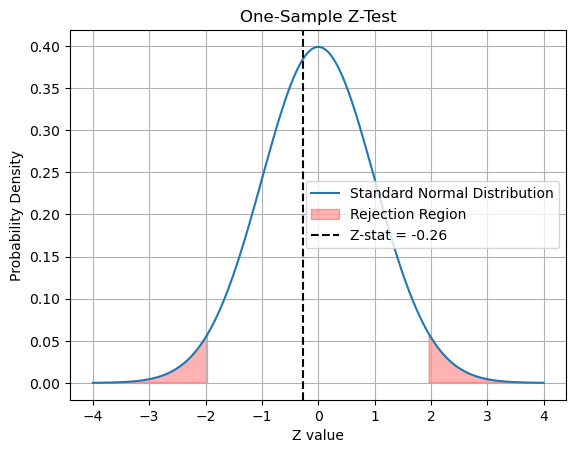

In [37]:
# Plot standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y, label='Standard Normal Distribution')

# Shade rejection region for 95% confidence
z_critical = norm.ppf(0.975)  # Two-tailed, alpha = 0.05
plt.fill_between(x, y, where=(x <= -z_critical) | (x >= z_critical), color='red', alpha=0.3, label='Rejection Region')

# Plot the computed Z-stat
plt.axvline(z_stat, color='black', linestyle='--', label=f'Z-stat = {z_stat:.2f}')

# Add labels
plt.title("One-Sample Z-Test")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.savefig('One_sample_Z_test.png')
plt.show()

## Two-Sample Z-test

#### Hypothesis
- Null Hypothesis: mu_0 = mu_1
- Alternative Hypothesis: mu_0 != mu_1 (two tail hypothesis)

In [41]:
#two sample Z-test
sample_size1=50
sample_size2=60
sample1=col_BMXLEG.sample(n=sample_size1,replace=False,random_state=42)
sample2=col_BMXLEG.sample(n=sample_size2,replace=False,random_state=42)

#---------Using Manual---------------------#
mu_0,mu_1=np.mean(sample1),np.mean(sample2)

std1,std2 =np.std(sample1,ddof=1),np.std(sample2,ddof=1)

#standard error
se=np.sqrt((std1**2/sample_size1) + (std2**2/sample_size2))

#z-test
z_stat=(mu_0-mu_1)/se

#p-value
p_val=2*(norm.sf(abs(z_stat)))

#----------Using Build in function------------#
z_stat, p_val = ztest(sample1, sample2)

print(f"Z={z_stat:.2f},p={p_val:.4f}")
print(f"mu_0:{mu_0:.2f}")
print(f"mu_1:{mu_1:.2f}")

Z=-0.59,p=0.5545
mu_0:38.00
mu_1:38.40


#### Interpretation

- The p-value (0.5545) is much greater than the typical significance level of 0.05.
- This means there is no statistically significant difference between the means of the two samples.
- Therefore, you fail to reject the null hypothesis.

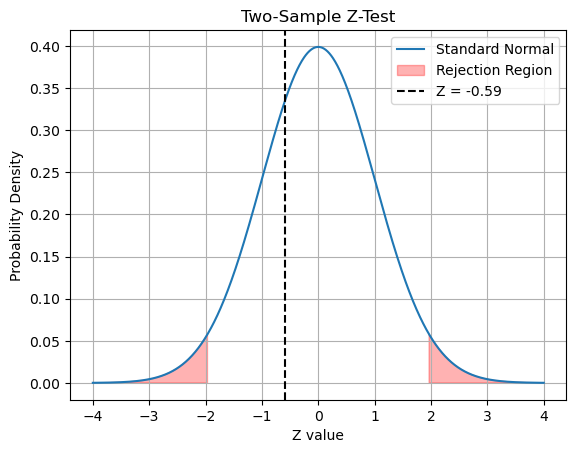

In [46]:
# Standard normal curve
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

# Critical values for α = 0.05
z_crit = norm.ppf(0.975) 

plt.plot(x, y, label='Standard Normal')
plt.fill_between(x, y, where=(x <= -z_crit) | (x >= z_crit), color='red', alpha=0.3, label='Rejection Region')

# Plot Z-score
plt.axvline(z_stat, color='black', linestyle='--', label=f'Z = {z_stat:.2f}')

plt.title("Two-Sample Z-Test")
plt.xlabel("Z value")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.savefig('two_sample_z_test.png')
plt.show()

## Z-Test for Proportions

#### Types of Z-Test for Proportions
1. ######  One_sample Z-test for proportions
   Used when you want to test whether a sample proportion is significantly different from a known or claimed population proportion.
2. ###### Two_sample z-test for proportions
   Used to compare proportions from two independent groups(e.g. convertion rate of A vs B)

### One-sample Z-test for proportions

#### Assumptions
Claiming 40% of people have BMXLEG >= 40 cm.

#### Hypothesis
- NUll Hypothesis(H_0): P_0 = 0.4
- Alternative Hypothesis(H_1): P_0 !=  0.4 (two tail test)

In [48]:
print(type(col_BMXLEG))

<class 'pandas.core.series.Series'>


In [52]:
from statsmodels.stats.proportion import proportions_ztest

#converting non numeric into numeric
col_BMXLEG = pd.to_numeric(col_BMXLEG, errors='coerce')
#convert into binary categirical data
success=(col_BMXLEG >= 40).astype(int)
#---------- Manually--------------------------------#
#one-sample z-test for proportions
p_0 = 0.4 #hypothesized proportion
sample= success.sample(n=100,random_state=42)
p_hat = np.mean(sample)
n=len(sample)

#z-score
z_stat=(p_hat-p_0)/ np.sqrt(p_0*(1-p_0)/n)
p_val= 2 * norm.sf(abs(z_stat))

#------------Using Built in functions---------------#

count = sample.sum()  # number of successes
nobs = len(sample)    # total observations

z_stat, p_val = proportions_ztest(count, nobs, value=p_0)

print(f"One-sample z: {z_stat:.3f}")
print(f"One-sample p-value: {p_val:.4f}")
print(f"Obeserved proportion: {p_hat:.2f}")


One-sample z: -3.464
One-sample p-value: 0.0005
Obeserved proportion: 0.25


#### Interpretation 
- since p-value =  0.0005 < 0.05, the result is statistically significant.
- Therefore we reject the null hypothesis

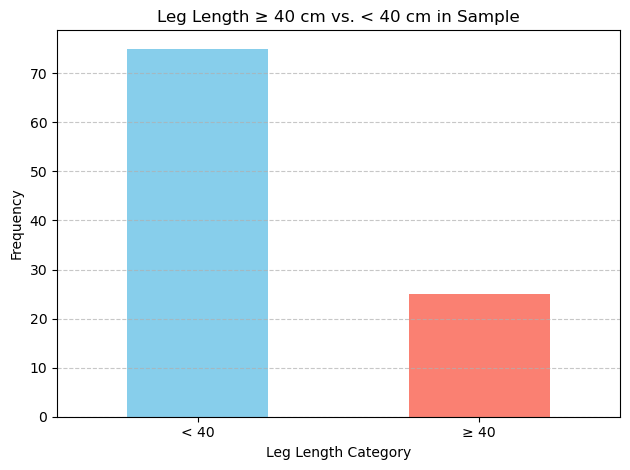

In [59]:
# Count plot of binary success variable
sample.value_counts().sort_index().plot(kind='bar', color=['skyblue', 'salmon'])

# Adding plot details
plt.title('Leg Length ≥ 40 cm vs. < 40 cm in Sample')
plt.xlabel('Leg Length Category')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['< 40', '≥ 40'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('One_sample_Z_test_for_proportions.png')
plt.show()

### Two_sample z-test for proportions

#### Assumptions
- there is no difference between two groups.

#### Hypothesis
- Null Hypothesis: p_1 = p_2
- Alternative Hypothesis: p_1 != p_2 (two tails)

In [67]:
#split into two groups
group1=success.sample(n=100,random_state=42)
#drop() to avoid duplicacy
group2=success.drop(group1.index).sample(n=100,random_state=43)

#------------Manually---------------------------------------------------#

x1, n1 = group1.sum(),len(group1) #sum()= counts 1s #len()= total no of observations
x2, n2 =group2.sum(),len(group2)

p_1, p_2 =x1/n1, x2/n2
p_pool =(x1+x2)/(n1+n2)

#z-score
z=(p_1-p_2)/np.sqrt(p_pool * (1- p_pool) * (1/n1 + 1/n2 ))

p_val= 2*norm.sf(abs(z_stat))

#--------------------Built-in Function--------------------------------------#
# Built-in z-test
count = [x1, x2]
nobs = [n1, n2]


z_stat, p_val = proportions_ztest(count, nobs)

# Proportions
p_1, p_2 = count[0]/nobs[0], count[1]/nobs[1]

print(f'Two sample z: {z:.3f}')
print(f'Two smple p-value: {p_value:.4f}')
print(f'Proportions: Group1(p_1)= {p_1:.2f},Group2(p_2)={p_2:.2f}')

Two sample z: -1.543
Two smple p-value: 0.8004
Proportions: Group1(p_1)= 0.25,Group2(p_2)=0.35


#### Interpretation
- Since the p-value = 0.8004 is much greater than the typical significance level (α = 0.05),
we fail to reject the null hypothesis
- therefore, Fail to reject the null hypothesis

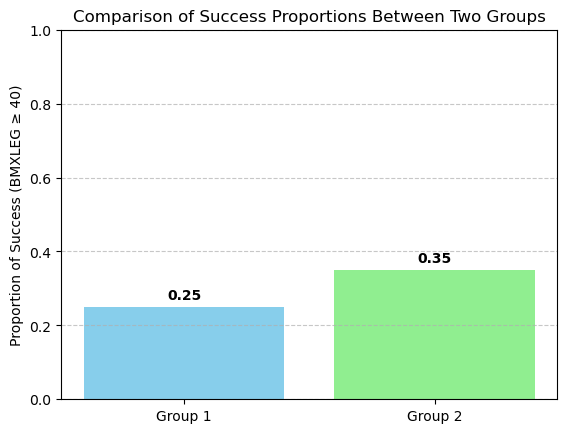

In [73]:
# Bar plot of proportions
groups = ['Group 1', 'Group 2']
proportions = [p_1, p_2]

plt.bar(groups, proportions, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.ylabel('Proportion of Success (BMXLEG ≥ 40)')
plt.title('Comparison of Success Proportions Between Two Groups')

# Annotate bars with values
for i, v in enumerate(proportions):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Two_sample_z_test_for_proportions.png')
plt.show()
